#Models d'Intel·ligència Artificial

##Segon lliurament

Aquesta tasca conté tres preguntes: una d'agents (6 punts), una de PDDL (2 punts) i una de lògica difusa (2 punts).

# 1. Agent per objectius

A l'activitat d'aprenentatge teniu un agent per resoldre graelles de **tangram** com els del puzzle 150deff5, el cinquè exemple de [arcprize.org](https://arcprize.org/).
Completau l'agent que teniu començat a l'**activitat d'aprenentatge** seguint les indicacions següents.

a) Comprovau que l'agent ja resol correctament el segon exemple d'entrenament, però no el primer ni el tercer.

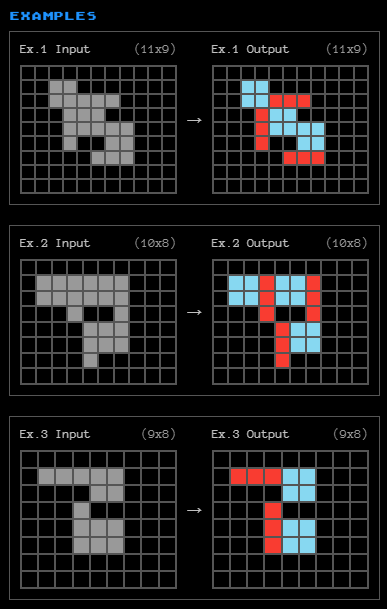

In [ ]:
# TANGRAM AGENT
import numpy as np
import itertools

def fit_squares(grid):
    # Retorna una llista de graelles amb un quadrat de 2x2 que encaixa dins l'ombra.
    rows, cols = grid.shape
    square_list = []
    for r in range(rows - 1):
        for c in range(cols - 1):
            if (
                grid[r, c] != 0
                and grid[r + 1, c] != 0
                and grid[r, c + 1] != 0
                and grid[r + 1, c + 1] != 0
            ):
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r + 1, c] = 1
                h[r, c + 1] = 1
                h[r + 1, c + 1] = 1
                square_list.append(h)
    return square_list

def fit_vertical_bars(grid):
    # Retorna una llista de graelles amb una barra de mida 3x1 dins l'ombra.
    rows, cols = grid.shape
    v_bar_list = []
    for r in range(rows - 2):
        for c in range(cols):
            if grid[r, c] != 0 and grid[r + 1, c] != 0 and grid[r + 2, c] != 0:
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r + 1, c] = 1
                h[r + 2, c] = 1
                v_bar_list.append(h)

    return v_bar_list


# Funció per resoldre el segon tangram obtinguda de la activitat d'aprenentatge
def solve_second_tangram(shadow):
    sq = fit_squares(shadow)
    vb = fit_vertical_bars(shadow)
    block_list = sq + vb

    peces = np.array(block_list)
    N = peces.shape[0]  # nombre de peces candidates
    n_solutions = 0  # Count the number of solutions

    for selector_de_peces in itertools.product(
        [0, 1], repeat=N
    ):  # cada peça pot ser-hi o no, generam totes les combinacions possibles
        suma_de_peces = np.sum(peces[np.array(selector_de_peces, dtype=bool)], axis=0)
        if np.array_equal(suma_de_peces, shadow):
            n_solutions += 1
            print(f"----- Solution {n_solutions} -----")
            print(f"Selector: {selector_de_peces}")
            print(f"Solved grid:\n{suma_de_peces}")

    if not n_solutions:
        print("This grid has no possible solutions")

grid_1 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

grid_2 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

grid_3 = np.array(
    [
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

print("GRID 1")
solve_second_tangram(grid_1)
print("GRID 2")
solve_second_tangram(grid_2)
print("GRID 3")
solve_second_tangram(grid_3)

GRID 1
This grid has no possible solutions
GRID 2
----- Solution 1 -----
Selector: (1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
GRID 3
This grid has no possible solutions


b) Ha de ser capaç de trobar solucions que incloguin barres horitzontals de 3x1 cel·les. Comprovau que amb aquesta modificació l'agent resol tots els exemples d'entrenament.


In [54]:
def fit_horizontal_bars(grid):
    # Retorna una llista de graelles amb una barra de mida 1x3 dins l'ombra.
    rows, cols = grid.shape
    h_bar_list = []
    for r in range(rows):
        for c in range(cols - 2):
            if grid[r, c] != 0 and grid[r, c + 1] != 0 and grid[r, c + 2] != 0:
                h = np.zeros(grid.shape)
                h[r, c] = 1
                h[r, c + 1] = 1
                h[r, c + 2] = 1
                h_bar_list.append(h)

    return h_bar_list

from itertools import product
# adaptam solve_second_tangram per a que pugui resoldre qualsevol tangram
def solve_tangram(shadow):
    sq = fit_squares(shadow)
    vb = fit_vertical_bars(shadow)
    hb = fit_horizontal_bars(shadow)
    block_list = sq + vb + hb

    peces = np.array(block_list)
    N = peces.shape[0]  # nombre de peces candidates
    n_solutions = 0  # Count the number of solutions

    for selector_de_peces in product(
        [0, 1], repeat=N
    ):  # cada peça pot ser-hi o no, generam totes les combinacions possibles
        suma_de_peces = np.sum(peces[np.array(selector_de_peces, dtype=bool)], axis=0)
        if np.array_equal(suma_de_peces, shadow):
            n_solutions += 1
            print(f"----- Solution {n_solutions} -----")
            print(f"Selector: {selector_de_peces}")
            print(f"Solved grid:\n{suma_de_peces}")
    print(f"Total solutions: {n_solutions}")
    if not n_solutions:
        print("This grid has no possible solutions")

print("GRID 1")
solve_tangram(grid_1)
print("GRID 2")
solve_tangram(grid_2)
print("GRID 3")
solve_tangram(grid_3)

GRID 1
----- Solution 1 -----
Selector: (1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Total solutions: 1
GRID 2
----- Solution 1 -----
Selector: (1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Total solutions: 1
GRID 3
----- Solution 1 -----
Selector: (1, 0, 1, 1, 1, 0, 0, 0, 0)
Solved grid:
[[0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 0

c) Ha de mostrar per la consola si ha aconseguit l'objectiu, i amb quantes solucions diferents.

Com es pot observar al apartat b, quan es executat el codi, es mostren les solucions per a cada tangram, i al final es mostra el total de solucions per a cada tangram.

d) Comprovau que la solució a l'exemple de test també és correcta.

In [55]:
grid_exemple = np.array(
    [
        [0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
        [0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0],
        [0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

print("----- EXAMPLE GRID -----")
solve_tangram(grid_exemple)

----- EXAMPLE GRID -----
----- Solution 1 -----
Selector: (1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1)
Solved grid:
[[0. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0.]
 [0. 0. 1. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 1. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
Total solutions: 1


e) Pensau una graella d'entrada que no tengui solució, i una altra que tengui més d'una solució. La resposta de l'agent en aquests casos és correcta?

In [56]:
# Una graella que no tengui solució podria ser una que intercala 1 i 0 de manera que no es pugui formar cap peça
grid_no_solution = np.array([[1, 0, 1], [0, 1, 0], [1, 0, 1]])
print("----- NO SOLUTION GRID -----")
solve_tangram(grid_no_solution)

# Graella amb més de una solució
grid_multiple_solutions = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]])
print("----- MULTIPLE SOLUTIONS GRID -----")
solve_tangram(grid_multiple_solutions)

----- NO SOLUTION GRID -----
Total solutions: 0
This grid has no possible solutions
----- MULTIPLE SOLUTIONS GRID -----
----- Solution 1 -----
Selector: (0, 0, 0, 0, 0, 0, 0, 1, 1, 1)
Solved grid:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
----- Solution 2 -----
Selector: (0, 0, 0, 0, 1, 1, 1, 0, 0, 0)
Solved grid:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]
Total solutions: 2


Es comporta de manera correcte, ja que en el cas que no hi hagi solució, el programa mostra que no hi ha solució, i en el cas que hi hagi més d'una solució, el programa mostra totes les solucions. En el exemple de múltiples solucions, podriem fer més gran la graella, però implicarà un temps d'execució més gran.

f) Escriviu funcions que mostrin les graelles amb gràfics de colors, com als exemples de la web arcprize.org.

GRID 1


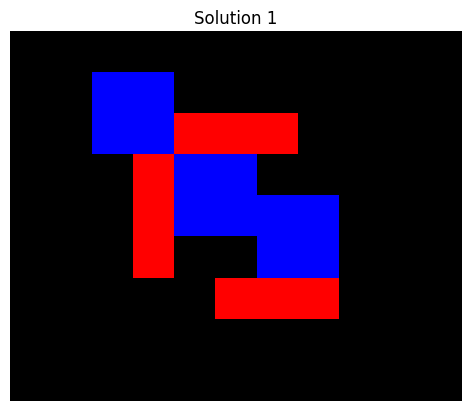

GRID 2


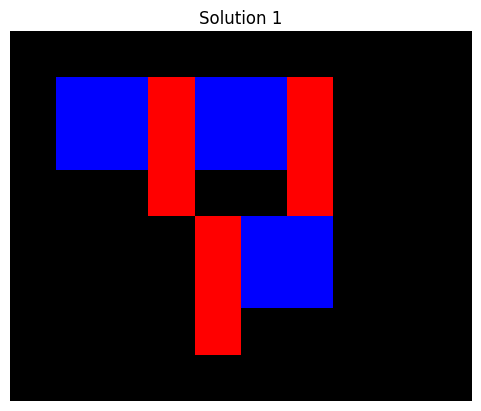

GRID 3


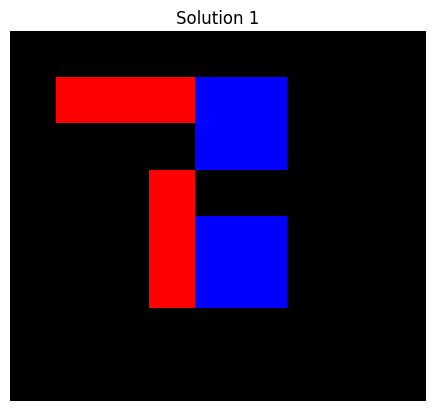

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product

# La solució és aplicable en aquest cas concret perquè només hi ha 2 (3) tipus de peces, però no és general ni escalable

def solve_and_colorize_tangram(grid):
    # Fit pieces
    sq = fit_squares(grid)
    vb = fit_vertical_bars(grid)
    hb = fit_horizontal_bars(grid)
    block_list = sq + vb + hb

    pieces = np.array(block_list)
    N = pieces.shape[0]
    n_solutions = 0

    # Iterate over all combinations of pieces
    for selector in product([0, 1], repeat=N):
        selected_pieces = pieces[np.array(selector, dtype=bool)]
        combined_pieces = np.sum(selected_pieces, axis=0)
        if np.array_equal(combined_pieces, grid):
            n_solutions += 1
            # Colorize solution
            color_grid = np.zeros((*grid.shape, 3))
            for i, include in enumerate(selector):
                if include:
                    piece = pieces[i]
                    if piece.sum() == 4:  # Square
                        color_grid[piece == 1] = [0, 0, 1]  # Blue
                    elif piece.sum() == 3:  # Bar
                        color_grid[piece == 1] = [1, 0, 0]  # Red
            
            # Plot the solution
            plt.imshow(color_grid, interpolation="nearest")
            # show grid lines
            plt.grid(True)
            plt.title(f"Solution {n_solutions}")
            plt.axis("off")
            plt.show()
    
    if n_solutions == 0:
        print("No solutions found.")



print("GRID 1")
solve_and_colorize_tangram(grid_1)
print("GRID 2")
solve_and_colorize_tangram(grid_2)
print("GRID 3")
solve_and_colorize_tangram(grid_3)



#2. PDDL

**a** Executau l'exemple de PDDL dels apunts a la pàgina web

http://editor.planning.domains/

i adjuntau una captura de la planificació que obteniu.




Per utilitzar la primera eina, seccionarem el domain i el problem en dos arxius distints. Seguidament emplearem la opció solver i seleccionarem el domain i el problem.

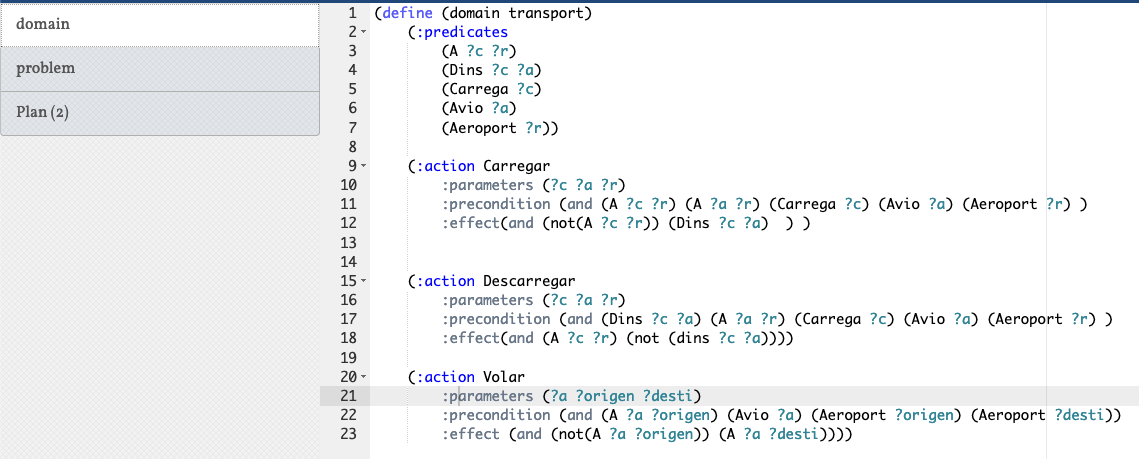

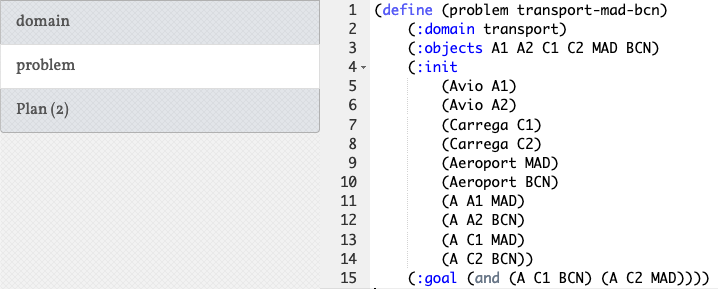



```
 --- OK.
 Match tree built with 20 nodes.

PDDL problem description loaded:
	Domain: TRANSPORT
	Problem: TRANSPORT-MAD-BCN
	#Actions: 20
	#Fluents: 12
Goals found: 2
Goals_Edges found: 2
Starting search with 1-BFWS...
--[2 / 0]--
--[2 / 1]--
--[2 / 2]--
--[2 / 3]--
--[1 / 0]--
--[1 / 3]--
--[0 / 0]--
--[0 / 3]--
Total time: 0.000122
Nodes generated during search: 31
Nodes expanded during search: 19
Plan found with cost: 8
Fast-BFS search completed in 0.000122 secs
```



I ens donarà els següents resultats, Found plan (output)

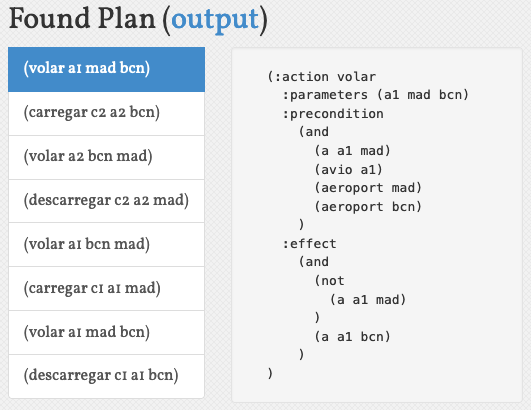
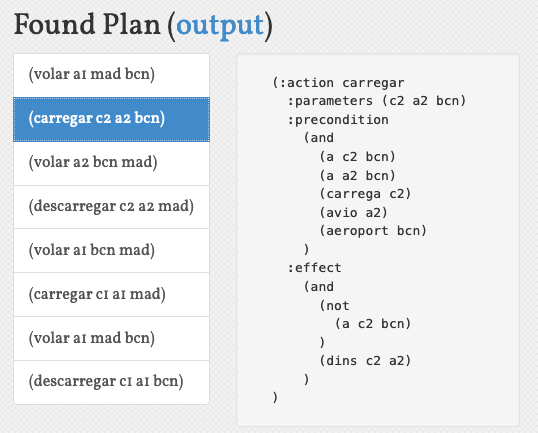
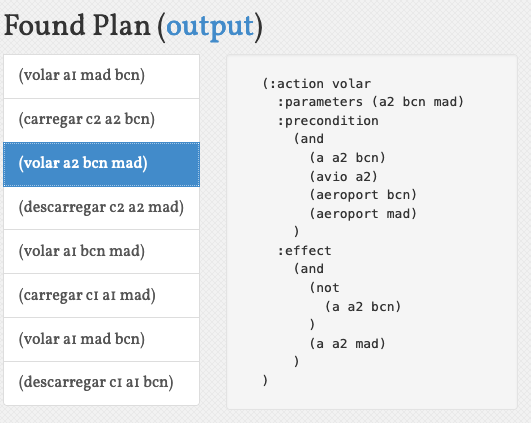
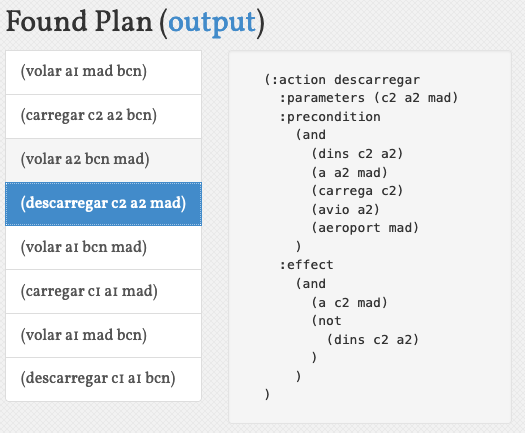
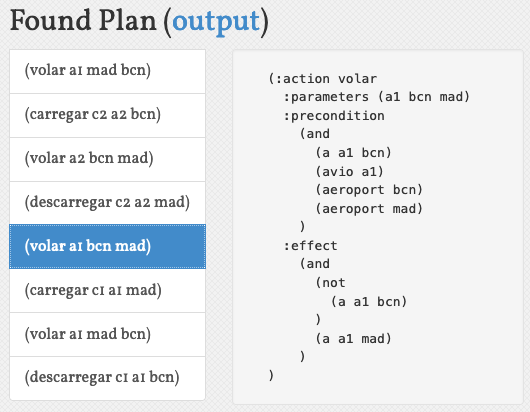
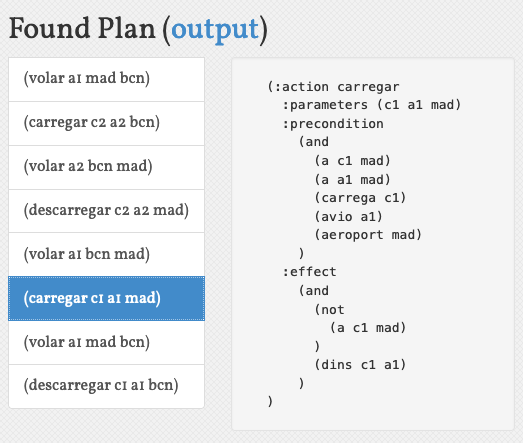
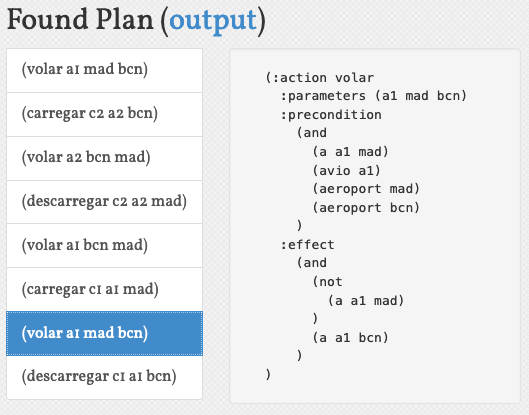
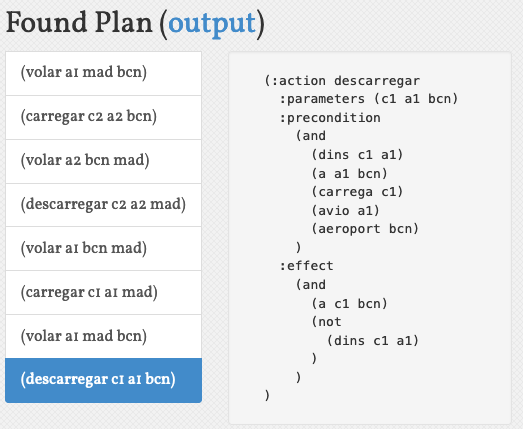

**b** Realitzau la mateixa planificació utilitzant les llibreries pddlpy (https://pypi.org/project/pddl/) i pyperplan comparau el resultat amb el de l'apartat anteriour. Escriviu el vostre codi a la cel·la de baix. Les planificacions que s'obtenen són iguals?

In [144]:
#planificació usant pddlpy i pyperplan
# the files are in the same directory as the notebook called domain.pddl and problem.pddl
from pddl.logic import Predicate, variables, constants
from pddl.core import Domain, Problem
from pddl.action import Action

# domain
a, c, r, origen, desti = variables('a c r origen desti')

at, dins, carrega, avio, aeroport = (
    Predicate('at', c, r),
    Predicate('dins', a, c),
    Predicate('carrega', c),
    Predicate('avio', a),
    Predicate('aeroport', r),
)
predicates = [at, dins, carrega, avio, aeroport]

carregar = Action('carregar',
    parameters=(a, c, r),
    precondition=at(c, r) & at(a, r) & carrega(c) & avio(a) & aeroport(r),
    effect=~at(c, r) & dins(c, a),
)

descarregar = Action("descarregar",
    parameters=[a, c, r],
    precondition=dins(c, a) & at(a, r) & carrega(c) & avio(a) & aeroport(r),
    effect=at(c, r) & ~dins(c, a),
)

volar = Action("volar",
    parameters=[a, origen, desti],
    precondition=at(a, origen) & avio(a) & aeroport(origen) & aeroport(desti),
    effect=~at(a, origen) & at(a, desti),
)

actions = [carregar, descarregar, volar]
transport = Domain("transport", predicates = predicates, actions = actions)

# Problem
a1, a2, c1, c2, mad, bcn = constants('a1 a2 c1 c2 mad bcn')
objects = [a1, a2, c1, c2, mad, bcn]
transport_mad_bcn = Problem(
    "transport-mad-bcn",
    domain=transport,
    objects=objects,
    init=[
        avio(a1),
        avio(a2),
        carrega(c1),
        carrega(c2),
        aeroport(mad),
        aeroport(bcn),
        at(a1, mad),
        at(a2, bcn),
        at(c1, mad),
        at(c2, bcn),
    ],
    goal=at(c1, bcn) & at(c2, mad),
)

# save the domain and problem to files
with open("transport.pddl", "w") as f:
    f.write(str(transport))

with open("transport-mad-bcn.pddl", "w") as f:
    f.write(str(transport_mad_bcn))



Com es podia esperar, hi ha diferències entre el solver de la web i el ppdl. Això és deu en que cada solver segueix ses seves pròpies instruccions. Per exemple, el primer pas del solver es volar de una ciutat a una altra, la qual cosa es podria considerar com un pas poc productiu o simplement inútil. Executarem el següent:

`pyperplan transport.pddl transport-mad-bcn.pddl`

Això ens crearà un fitxer transport-mad-bcn.pddl.soln 

Podem observar com el primer pas efectivament es carrergar enlloc de viatjar directament, optimitzant el procés. Podem observar també com el 5è pas torna a volar de BCN a MAD sense contingut, fent un pas innesari en el solver web mentre que al pddl sempre fa vols productius i optimitzats.

#3 Lògica difusa

A partir de l'exemple dels apunts del càlcul de la propina, obteniu una gràfica que mostri la forma de la funció que hem implementat. Es tracta d'obtenir una representació semblant a la de la figura. Aquest gràfic ens mostra la utilitat de la lògica difusa: definir una funció suau relativament complexa a partir de tot just algunes descripcions vagues, poc precises.

Aquí teniu la documentació per realitzar gràfics tridimensionals amb Python.

https://matplotlib.org/stable/gallery/mplot3d/index.html

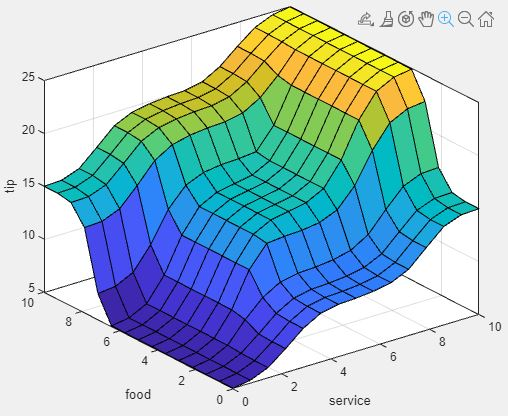

He empleat de exemple https://colab.research.google.com/drive/1SRq6mvtxQaCBbnC82tDrg1mByK9nDVCf?usp=sharing#scrollTo=RaglMwE3pe0H:

In [135]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

food_quality = ctrl.Antecedent(np.arange(0, 11, 1),'qualitat del menjar')
service_quality = ctrl.Antecedent(np.arange(0,11,1), 'qualitat del servei')
tip = ctrl.Consequent(np.arange(0,26,1),'propina')

food_quality.automf(names=['dolenta','mitjana','bona'])
service_quality.automf(names=['dolent','acceptable','increïble'])

tip['baixa'] = fuzz.trimf(tip.universe,[0,0,13])
tip['mitjana'] = fuzz.trimf(tip.universe,[0,13,25])
tip['alta'] = fuzz.trimf(tip.universe, [13,25,25])

tipping = ctrl.ControlSystemSimulation(ctrl.ControlSystem([
    ctrl.Rule(food_quality['dolenta'] | service_quality['dolent'], tip['baixa']),
    ctrl.Rule(service_quality['acceptable'] | service_quality['dolent'], tip['baixa']),
    ctrl.Rule(food_quality['bona'] | service_quality['increïble'], tip['alta'])
]))

tipping.inputs({
    'qualitat del menjar':7,
    'qualitat del servei':6
})

tipping.compute()

print(tipping.output['propina'])

10.429100529100525


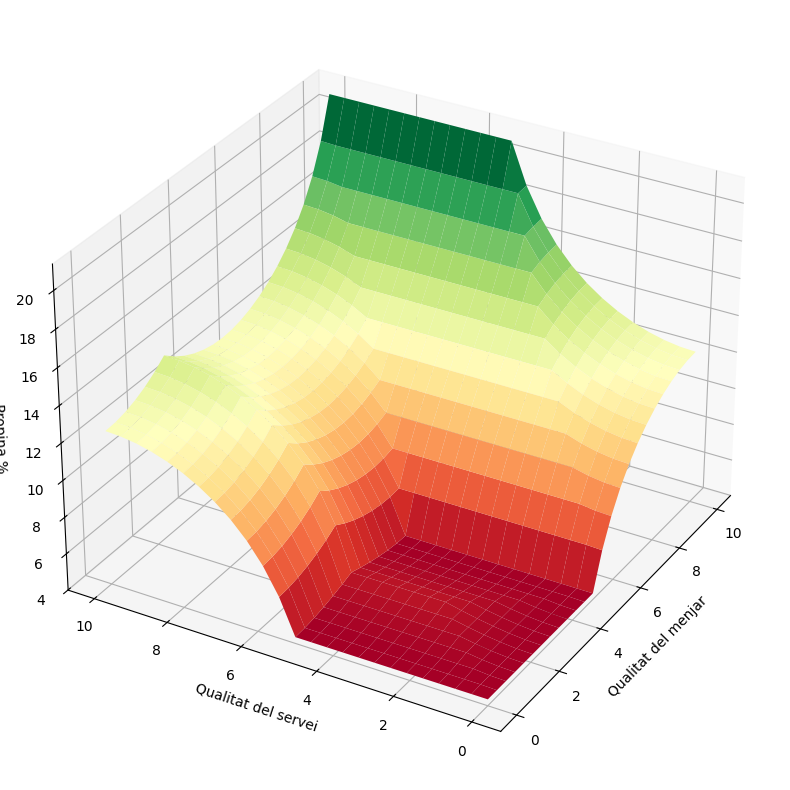

In [140]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

SAMPLES = 25

menjar = np.linspace(0, 10, SAMPLES)
servei = np.linspace(0, 10, SAMPLES)
tip = np.zeros((SAMPLES, SAMPLES))
servei, menjar = np.meshgrid(servei, menjar)

for i in range(SAMPLES):
    for j in range(SAMPLES):
        tipping.input['qualitat del menjar'] = menjar[i, j]
        tipping.input['qualitat del servei'] = servei[i, j]
        tipping.compute()
        tip[i, j] = tipping.output['propina']

fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Qualitat del menjar')
ax.set_ylabel('Qualitat del servei')
ax.set_zlabel('Propina %')
ax.view_init(30, -150)
surf = ax.plot_surface(servei, menjar, tip, cmap='RdYlGn')

plt.show()